In [1]:
import pandas as pd
import numpy as np 

In [2]:
# For classification we will experiment on the MNIST dataset

from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
X, y = mnist['data'], mnist['target']

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
# Taking a peek into the dataset by converting the image back into its configuration of 28 x 28 and display it using...
# ...matplotlib's imshow function

import matplotlib
import matplotlib.pyplot as plt

some_digit = X[69000]

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
y[69000]

'7'

In [12]:
# By MNIST dataset is actually split into training and test datasets, the first 60,000 belong to the training and   ...
# ... remaining belong to test

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
y_train

array(['1', '3', '4', ..., '6', '5', '2'], dtype=object)

In [15]:
# Using fetch_openml to load the MNIST dataset the output values are in strings so we have to convert them into int8

y_train = y_train.astype('int8')
y_test = y_test.astype('int8')

### Training a Binary Classifier

In [16]:
# Creating a binary classifier which will detect if the image is of digit 7 or not

y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [17]:
np.unique(y_train_7)

array([False,  True])

In [18]:
# Choosing SGD Classifier as our classifier from scikit-learn

from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf = SGDClassifier(random_state=42)

In [20]:
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [21]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [22]:
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures

#### Measuring Accuracy using Cross-Validation

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [24]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle=True)

In [25]:

for train_index, test_index in skfolds.split(X_train, y_train_7):
    
    clone_clf = clone(sgd_clf)
    
    # Now we have the train_index and test_index which can be used to get the training and testing data
    X_train_kfolds = X_train[train_index]
    y_train_kfolds = (y_train_7[train_index])
    X_test_kfolds = X_train[test_index]
    y_test_kfolds = (y_train_7[test_index])
    
    clone_clf.fit(X_train_kfolds, y_train_kfolds)
    y_pred = clone_clf.predict(X_test_kfolds)
    n_correct = sum(y_pred == y_test_kfolds)
    
    print(n_correct/len(y_pred)) 
    

0.97865
0.9678
0.9786


In [26]:
# Using cross-validation score for evaluation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_7, scoring='accuracy', cv=3)

In [27]:
# We are getting a pretty good accuracy, what will be the accuracy if we created a classifier which classified as every...
# ... image does not belong to 7. Let's do that and calculate its accuracy.

scores

array([0.9787, 0.9731, 0.9791])

In [28]:
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

never7classifier = Never7Classifier()
cross_val_score(never7classifier, X_train, y_train_7, cv=3, scoring='accuracy')        

array([0.8955 , 0.89495, 0.8963 ])

In [29]:
# A classifier that always classify an image to be non 7 is giving an accuracy of 90% approx, this suggests that few...
# ... part of our data actually to class 7 and the classifier is efficient in classifying that data as not belonging...
# ... to class 7

# This suggests why accuracy is not a preferred performance measure in terms of classifiers, specially when we are...
# ... dealing with skewed datasets. A useful tool to measure performance of a classifier can be confusion matrix...
# ... but for dealing with confusion matrix we need a set of prediction values, that we can get from cross_val_predict

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

In [30]:
# Importing the confusion_matrix class

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_7, y_train_pred)

array([[52899,   836],
       [  546,  5719]], dtype=int64)

In [31]:
# The measure that we use to evaluate the performance of the confusion matrix is precision and recall

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_7, y_train_pred)

0.8724637681159421

In [32]:
recall_score(y_train_7, y_train_pred)

0.9128491620111732

    Here we encountered two terms :
    
    1) Recall or Sensitivity : which is the proportion of the correct classification and is defined by
                            
                            TP/( TP + FN)
                            
    2) Precision : TP/( TP + FP )

    it is often convenient to combine precision and recall into a single metric called the F1score, in particular if you
    need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall.    

    Ultimately, if precision and recall would be higher then F1 score would be higher too.

In [33]:
# Computing F1-Score

from sklearn.metrics import f1_score

f1_score(y_train_7, y_train_pred)

0.8921996879875195

    Unfortunately, recall and precision depends on the need of the model that we want to deploy. Sometimes we would want
    our model to have high recall value otherwise we would want high precision value, we can't have it both ways
    increasing precision reduces recall and vice-versa. This is called precision/recall tradeoff.

### Precision-Recall TradeOff

    Scikit learn doesn't let us set the threshold value, but we can see the decision scores it uses in order to classify
    each row of data, we can do this by using the cross_val_predict function and specifying method = "decision_function".

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3, method='decision_function')

In [36]:
y_scores

array([ -5656.31221009, -67231.31317684, -11757.55410117, ...,
       -72052.88936171, -29111.47644941, -79129.80809304])

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

In [39]:
precisions[:-1]

array([0.11991578, 0.11989894, 0.11990123, ..., 1.        , 1.        ,
       1.        ])

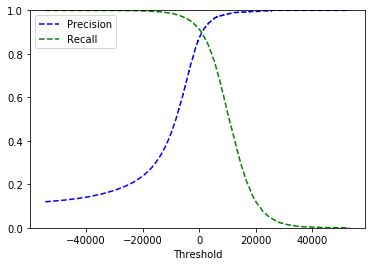

In [40]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

In [41]:
# Plotting a auc_roc curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=None)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

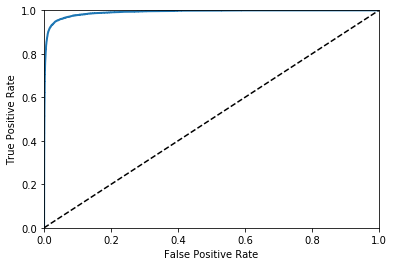

In [44]:
plot_roc_curve(fpr, tpr)
plt.show()

In [45]:
# And the measure to compare the classifiers is the AOC i.e Area Under the Curve

roc_auc_score(y_train_7, y_scores)

0.9909255189610627

In [46]:
precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [47]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [48]:
# Creating Auc_Roc Curve for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [49]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probabs = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, method='predict_proba')

In [50]:
print(y_probabs.shape)

(60000, 2)


In [51]:
y_scores_forest = y_probabs[:,1]

In [52]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

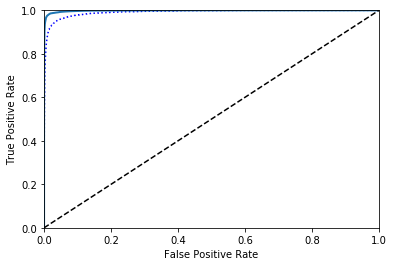

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.show()

### Multiclass Classification

    OvA Strategy
    OvO Strategy, For Binary Classifiers.

In [54]:
# Scikit learn automatically detects when we try to use a binary classification algorithm to do multiclass classification...
# ... and it automatically uses One versus All in the background except for the case of SVM where it uses One vs One...
# ... for classification.

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([7], dtype=int8)

In [56]:
# let's understand whats really going on in the background

some_digit_scores = sgd_clf.decision_function([some_digit])

In [57]:
some_digit_scores

array([[-23981.11601936, -36377.81409043, -21941.17326715,
        -12298.00001616, -13322.90785091, -14204.33349433,
        -49170.57583584,   7810.51397253,  -5988.88758891,
         -6405.23635237]])

In [58]:
np.argmax(some_digit_scores)

7

In [59]:
# Creating a OvO classifier

from sklearn.multiclass import OneVsOneClassifier

In [60]:
ovo_clf = OneVsOneClassifier((SGDClassifier(random_state=42)))

In [61]:
ovo_clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [62]:
ovo_clf.predict([some_digit])

array([7], dtype=int8)

In [63]:
len(ovo_clf.estimators_)

45

In [65]:
# However, RandomForestClassifier can directly predict the classes among various multiclasses and we can call ...
# ...predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([7], dtype=int8)

In [66]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.01, 0.  ]])

In [67]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87285, 0.86015, 0.8752 ])

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
X_train.dtype

dtype('float64')

In [70]:
scaler = StandardScaler()

In [71]:
X_train_scaled = scaler.fit_transform(X_train)

In [72]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\Jahanvi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


KeyboardInterrupt: 

In [76]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

C:\Users\Jahanvi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [77]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [78]:
conf_mx

array([[5604,    0,   19,    5,   11,   48,   33,    6,  196,    1],
       [   0, 6420,   46,   23,    3,   42,    5,    8,  182,   13],
       [  26,   27, 5282,   87,   73,   24,   63,   40,  327,    9],
       [  26,   19,  123, 5253,    1,  209,   23,   46,  364,   67],
       [  14,   13,   50,    9, 5236,    9,   36,   20,  301,  154],
       [  31,   17,   31,  162,   49, 4507,   78,   16,  463,   67],
       [  30,   17,   49,    3,   40,   89, 5555,    8,  126,    1],
       [  23,   13,   53,   25,   47,   10,    5, 5706,  168,  215],
       [  16,   62,   40,   97,    3,  123,   27,   10, 5429,   44],
       [  25,   21,   31,   59,  129,   37,    1,  174,  313, 5159]],
      dtype=int64)

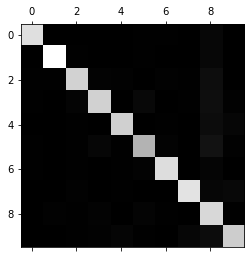

In [79]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [80]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [81]:
norm_conf_mx = conf_mx/row_sums

In [83]:
np.fill_diagonal(norm_conf_mx, 0)

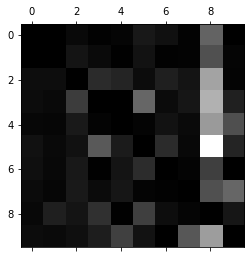

In [84]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)